Task - 01

Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

Dataset : - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [17]:
pip install scikit-learn

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [19]:
np.random.seed(0)
n_samples = 100
square_footage = np.random.randint(1000, 5000, size=n_samples)
num_bedrooms = np.random.randint(2, 6, size=n_samples)
num_bathrooms = np.random.randint(1, 4, size=n_samples)
house_prices = 100 * square_footage + 50 * num_bedrooms + 75 * num_bathrooms + np.random.randn(n_samples) * 10000

In [20]:
data = pd.DataFrame({'SquareFootage': square_footage, 'Bedrooms': num_bedrooms, 'Bathrooms': num_bathrooms, 'Price': house_prices})

In [21]:
X = data[['SquareFootage', 'Bedrooms', 'Bathrooms']]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)
print(model)


LinearRegression()


In [24]:
y_pred = model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [26]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 104135500.00
R-squared: 0.98


In [27]:
new_house = np.array([[2500, 3, 2]])  # Replace with your values
predicted_price = model.predict(new_house)
print(f"Predicted Price for the New House: ${predicted_price[0]:.2f}")

Predicted Price for the New House: $250958.55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
cv_scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Scores:', cv_scores)
print('Mean CV Score:', cv_scores.mean())

Cross-Validation Scores: [0.99026099 0.98663714 0.9913758  0.99005601 0.99472378]
Mean CV Score: 0.9906107443998782


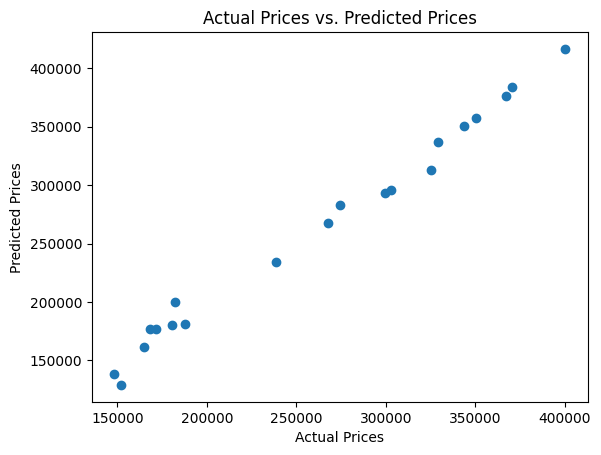

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

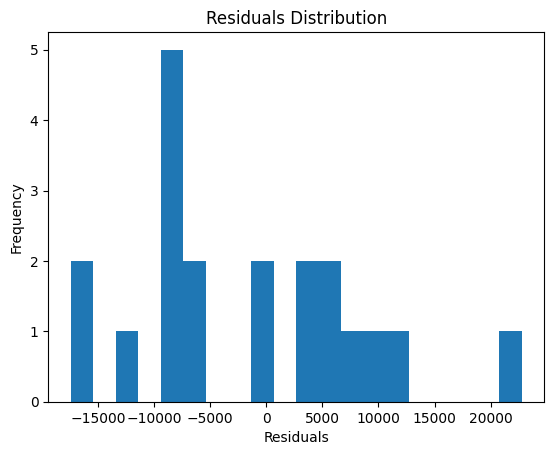

In [30]:
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()